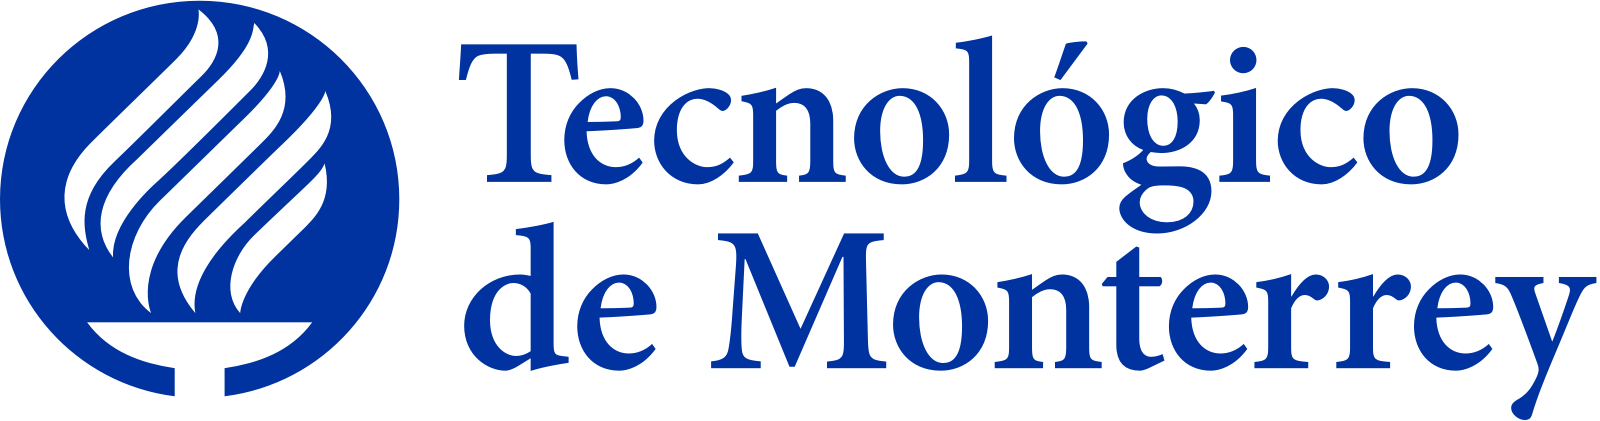

#**Maestría en Inteligencia Artificial Aplicada**

**Asignatura:** Ciencia y analítica de datos

**Profesor Titular:** Jobish Vallikavungal Devassia - María de la Paz Rico Fernández

**Tema:** Repaso Transformación y reducción de dimensiones

**Estudiante:** 
* Henry Junior Aranzales Lopez - Matrícula: A01794020

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [8]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

#TU CODIGO AQUI-------------------------------------
B= W.dot(D).dot(Winv)
print(B)
print("-----------------------------")


-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


Al correr la sección se puede observar que el tipo de datos de la matriz reconstruida es un de punto flotante, en comparación con la matriz original, cuyos datos son de tipo int. Para este ejercicio también observamos que la matriz reconstruida es igual a la matriz original. 

Tambié es importante destacar que para llevar a cabo la reconstrucción de los datos es necesario realizar el producto punto de las matrices W, D y Winv.



In [6]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [35]:
#Matriz 1

M1=array([[3,0,2],[3,0,-2],[0,1,1]])

print('\nMatriz M1 original\n')
print(M1)

# Valores de eigen de descomposición

values1, vectors1 = eig(M1)

print("-----------------------------")

print('\nValores y Vectores\n')
print(values1)
print(vectors1)

print("-----------------------------")

# Reconstrucción

values1, vectors1 = np.linalg.eig(M1)

W1 = vectors1.round(2)
W1inv = np.linalg.inv(W1)
D1 = np.diag(values1)

WD1 = np.dot(W1,D1)

M1_reconstruccion= np.dot(WD1,W1inv).round(0)

print('\nMatriz M1 reconstruida\n')
print(M1_reconstruccion)


Matriz M1 original

[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------

Valores y Vectores

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------

Matriz M1 reconstruida

[[ 3.+0.j  0.-0.j  2.+0.j]
 [ 3.-0.j  0.+0.j -2.-0.j]
 [-0.+0.j  1.-0.j  1.-0.j]]


In [29]:
#Matriz 2

M2=array([[1,3,8],[2,0,0],[0,0,1]])

print('\nMatriz M2 original\n')
print(M2)

# Valores de eigen de descomposición

values2, vectors2 = eig(M2)

print("-----------------------------")

print('\nValores y Vectores\n')
print(values2)
print(vectors2)

print("-----------------------------")

# Reconstrucción

values2, vectors2 = np.linalg.eig(M2)

W2 = vectors2.round(2)
W2inv = np.linalg.inv(W2)
D2 = np.diag(values2)

WD2 = np.dot(W2,D2)

M2_reconstruccion= np.dot(WD2,W2inv).round(0)

print('\nMatriz M2 reconstruida\n')
print(M2_reconstruccion)


Matriz M2 original

[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------

Valores y Vectores

[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-----------------------------

Matriz M2 reconstruida

[[ 1.  3.  8.]
 [ 2. -0. -0.]
 [ 0.  0.  1.]]


In [36]:
#Matriz 3

M3=array([[5,4,0],[1,0,1],[10,7,1]])

print('\nMatriz M3 original\n')
print(M3)

# Valores de eigen de descomposición

values3, vectors3 = eig(M3)

print("-----------------------------")

print('\nValores y Vectores\n')
print(values3)
print(vectors3)

print("-----------------------------")

# Reconstrucción

values3, vectors3 = np.linalg.eig(M3)

W3 = vectors3.round(2)
W3inv = np.linalg.inv(W3)
D3 = np.diag(values3)

WD3 = np.dot(W3,D3)

M3_reconstruccion= np.dot(WD3,W3inv).round(0)

print('\nMatriz M3 reconstruida\n')
print(M3_reconstruccion)


Matriz M3 original

[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------

Valores y Vectores

[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-----------------------------

Matriz M3 reconstruida

[[ 5.  4. -0.]
 [ 1.  0.  1.]
 [10.  7.  1.]]


Una vez realizado el ejercicio con base a la documentación consultada, es posible dar respuesta al siguiente interrogante: 

¿CÓMO SE REALIZA UN ANÁLISIS DE COMPONENTES PRINCIPALES?

1. Estandarizar el rango de variables iniciales continuas
2. Calcular la matriz de covarianza para identificar correlaciones
3. Calcular los vectores propios y los valores propios de la matriz de covarianza para identificar los componentes principales
4. Crear un vector de características para decidir qué componentes principales mantener
5. Refundir los datos a lo largo de los ejes de componentes principales

Adicionalmente, se puede verificar que el análisis de componentes principales, o PCA, es un método de reducción de dimensionalidad que se utiliza a menudo para reducir la dimensionalidad de grandes conjuntos de datos, transformando un gran conjunto de variables en uno más pequeño que aún contiene la mayor parte de la información en el conjunto grande.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


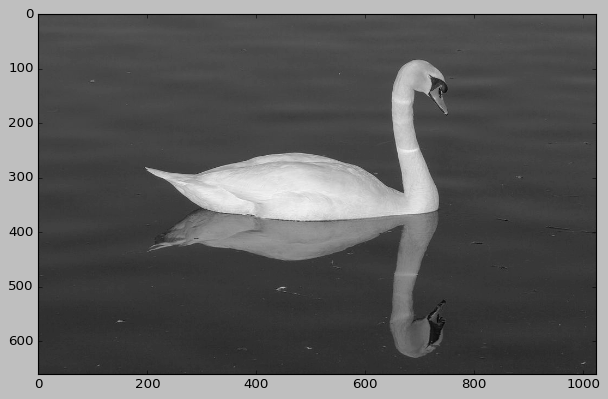

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F347A764390>


In [37]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [38]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [39]:
U.shape

(660, 660)

In [40]:
V.shape

(1024, 1024)

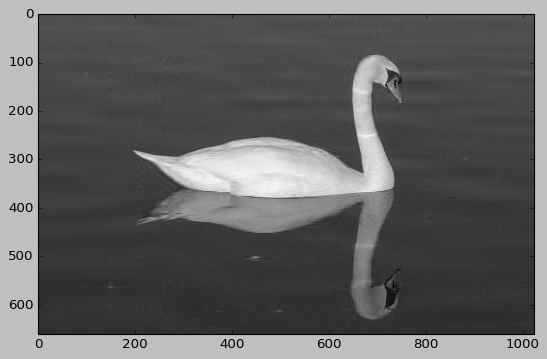

Felicidades la imagen está comprimida


In [41]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[206. 206. 206. ... 107. 108. 109.]


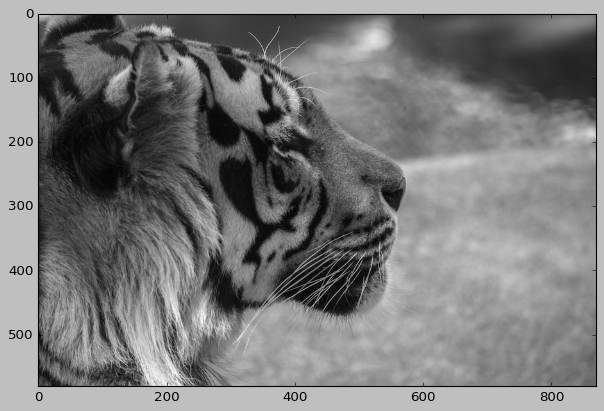

<PIL.Image.Image image mode=LA size=870x580 at 0x7F346F9E9150>


In [48]:
#imagen 1
plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://images.unsplash.com/photo-1533450718592-29d45635f0a9?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

In [49]:
# Descomposición por SVD (Single Value Decomposition)

a1,b1,c1 = np.linalg.svd(imgmat1)
print(imgmat1.shape)

print(a1.shape)
print(b1.shape)
print(c1.shape)

(580, 870)
(580, 580)
(580,)
(870, 870)


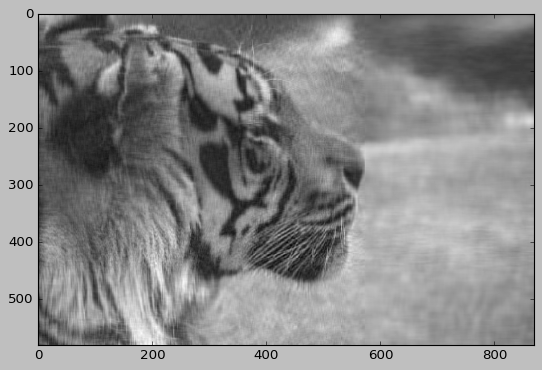

In [50]:
# Los valores van de 0-780

nvalue1 = 45

# En esta línea se hace una reconstrucción de la imagen original con base en el nvalue, mientras mayor sea,
# mayor será la calidad de la reconstrucción, siempre y cuando no sobre pase el tamaño original de la foto

#------------------------------
reconstimg1 = np.matrix(a1[:,:nvalue1])*np.diag(b1[:nvalue1])*np.matrix(c1[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion
#400x400= a1(400x400)b1(400)c1(400)
        #=a1(400Xnvalue2)b1(nvalue2Xnvalue2)c1(nvalue2x400)

      
plt.imshow(reconstimg1,cmap='gray')
plt.show()

[25. 23. 29. ... 28. 28. 28.]


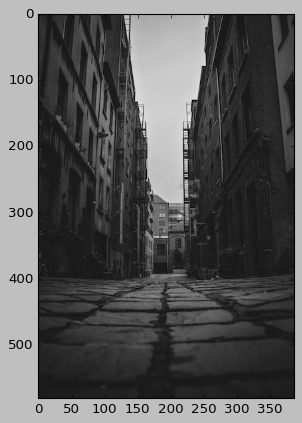

<PIL.Image.Image image mode=LA size=870x580 at 0x7F346F9E9150>


In [51]:
#imagen 2

plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://images.unsplash.com/photo-1639241423587-a9802ac301bc?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80')).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img1)

In [52]:
# Descomposición por SVD (Single Value Decomposition)

a2,b2,c2 = np.linalg.svd(imgmat2)
print(imgmat2.shape)

print(a2.shape)
print(b2.shape)
print(c2.shape)

(580, 387)
(580, 580)
(387,)
(387, 387)


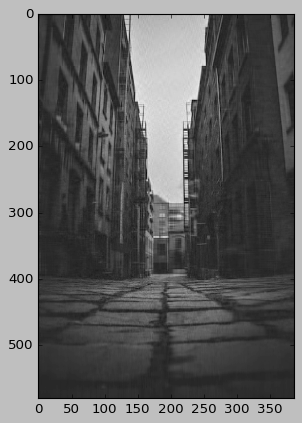

Felicidades la imagen está comprimida


In [58]:
# Los valores van de 0-1024

nvalue2 = 60


# En esta línea se hace una reconstrucción de la imagen original con base en el nvalue, mientras mayor sea,
# mayor será la calidad de la reconstrucción, siempre y cuando no sobre pase el tamaño original de la foto

#------------------------------
reconstimg2 = np.matrix(a2[:,:nvalue2])*np.diag(b2[:nvalue2])*np.matrix(c2[:nvalue2,:])
#ve las dimensiones de la imagen y su descomposicion
#400x400= a1(1024x1024)b1(1024)c1(1024)
        #=a1(1024Xnvalue2)b1(nvalue2Xnvalue2)c1(nvalue2x400)

      
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[180. 180. 181. ...  14.  13.  12.]


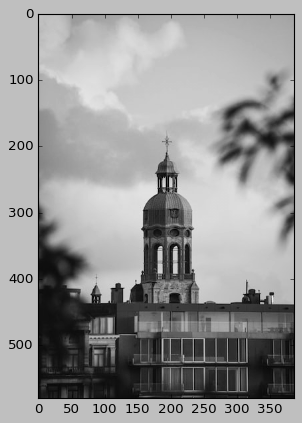

<PIL.Image.Image image mode=LA size=387x580 at 0x7F346F832290>


In [54]:
#imagen 3

plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://images.unsplash.com/photo-1638718619061-54b56803f459?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80')).convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

In [55]:
# Descomposición por SVD (Single Value Decomposition)

a3,b3,c3 = np.linalg.svd(imgmat3)
print(imgmat3.shape)

print(a3.shape)
print(b3.shape)
print(c3.shape)

(580, 387)
(580, 580)
(387,)
(387, 387)


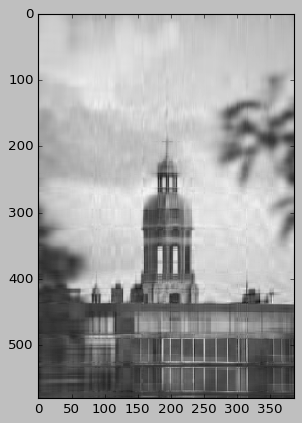

Felicidades la imagen está comprimida


In [57]:
##Los valores van de 0-914

nvalue3 = 20


# En esta línea se hace una reconstrucción de la imagen original con base en el nvalue, mientras mayor sea,
# mayor será la calidad de la reconstrucción, siempre y cuando no sobre pase el tamaño original de la foto

#------------------------------
reconstimg3 = np.matrix(a3[:,:nvalue3])*np.diag(b3[:nvalue3])*np.matrix(c3[:nvalue3,:])
#ve las dimensiones de la imagen y su descomposicion


      
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

La compresión de imágenes es un tema muy importante en el procesamiento digital de imágenes, debido a que permite almacenar o transmitir los datos de las imágenes de manera eficiente. En el caso de las imágenes, la compresión es más bien un proceso de reducción. Esto significa que hay un mayor énfasis en quitar datos de tu imagen para reducir el tamaño del archivo, manteniendo la calidad lo más alta posible.


El proceso lelvado a caabo fue el siguiente: 

1. Se carga la imagen.

2. Se visualiza la imagen en su configuración y tamaño original.

3. Se realiza la descomposición singular de valores.

4. Se obtienen las matrices de valores singulares, y el vector de valores singulares.

5. Se obtiene el tamaño de cada una estos.

6. Para realizar la reconstrucción de la imagen original, seleccionamos el tamaño de las diferentes matrices. Al utilizar el tamaño adecuado de la matriz podemos observar que la imagen reconstruida es muy similar e incluso idéntica a la imagen original en caso de que dicho valor sea mayor; por el contrario, si el valor es menor, la imagen pierde calidad. Esto permite concluir que una compresión sin pérdidas devuelve la imagen descomprimida exactamente igual a la original. Por el contrario, la compresión con pérdidas acepta alguna degradación en la imagen de cara a una mayor compresión.

7. Reconstrucción de la imagen por medio de la multiplicación Im_Reconstruida = UDV.

8. Despliegue de la imagen, para poder realizar las diferentes comparaciones visuales.


Se pudo comporbar que cuando se trata de cualquier compresión de imágenes digitales, hay varios formatos diferentes entre los que elegir. A veces tienen otros nombres, dependiendo de muchos factores. Sin embargo, a nivel básico, encontrarás dos tipos:
>> Compresión con pérdidas: El objetivo aquí es proporcionar el menor tamaño de archivo posible para una imagen. Por ello, la calidad de la imagen suele tener poca importancia en la lista de prioridades.

>> Compresión sin pérdidas: Con este formato de compresión seguirás encontrando una reducción sustancial del tamaño del archivo, pero la imagen no sufrirá artefactos ni otros problemas.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [60]:
#Importación de librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Se cargan los datos a utilizar
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Se lleva a cabo la transformación de las variables
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Desarrollo del modelo PCA
pca = PCA(n_components=2) # Solo se estiman 2 componentes principales.
X_new = pca.fit_transform(X) # Se proyectan los datos originales en el espacio PCA

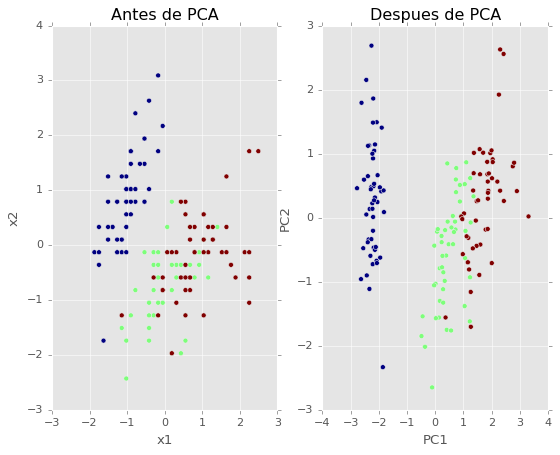

In [62]:
#Se grafican los datos en el espacio original y a continuación en el espacio PCA, por medio de una grafica de dispersión
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Despues de PCA')
plt.show()

In [63]:
#imprime la varianza de los componentes principales.
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [64]:
#Imprime la matriz de covarianza
#para comprobar  la igualdad de la
#varianza del espacio reducido.
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [65]:
#La importancia de cada caracteristica se encuentra reflejada por la
#magnitud de los correspondientes valores dentro de los eigenvectores
#mayor magnitud, mayor importancia.
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [66]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

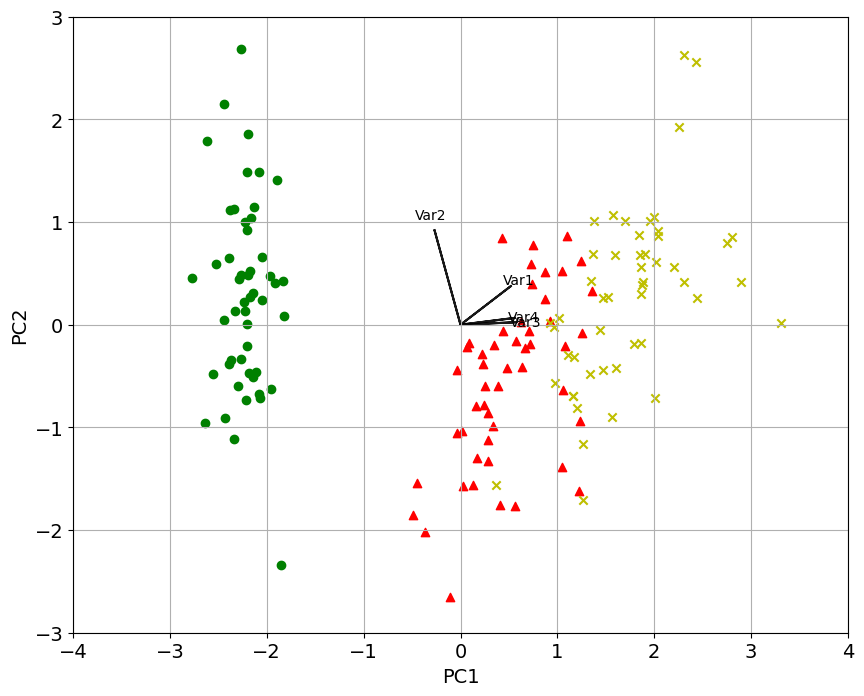

In [67]:
#Importa la libreria matplotlib
#Hace un llamado a la función de graficado y muestra la grafica de los datos 
#y los #vectores de caracteristicas
 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [70]:
# Imprime el coeficiente de correlacion entre las variables 3 y 4

np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [71]:
#Imprime el coeficiente de correlacion 

np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Se puede apreciar que las variables 2 y 3 se encuentran negativamente relacionadas. 

### Preguntas

Comentario relacionado al ejercicio:

* ¿Qué es feature importance y para que nos sirve? 

>> Feature Impotance se refiere a las técnicas que asignan una puntuación a las características de entrada en función de lo útiles que son para predecir una variable objetivo.

>> Hay muchos tipos y fuentes de puntuaciones de importancia de características, aunque los ejemplos populares incluyen puntuaciones de correlación estadística, coeficientes calculados como parte de modelos lineales, árboles de decisión y puntuaciones de importancia de permutación.

>> Las puntuaciones de importancia de las características desempeñan un papel importante en un proyecto de modelado predictivo, ya que incluyen proporcionar información sobre los datos, información sobre el modelo y la base para la reducción de dimensionalidad y la selección de características que pueden mejorar la eficiencia y efectividad de un modelo predictivo sobre el problema.
Feature importance no solamente se usa en PCA, pues hay muchos tipos y fuentes análisis de componentes principales, aunque los ejemplos populares incluyen correlación estadística, coeficientes calculados como parte de modelos lineales, árboles de decisión y puntajes de importancia de permutación.

>> De una manera muy genérica, las razones más importantes para usar selección de variables antes de alimentar cualquier modelo matemático son:

>> * Entrenar algoritmos a mayor velocidad.
* Reducir la complejidad del modelo y hacer más fácil su interpretación.
* Mejorar la precisión del modelo (si se ha escogido bien el subconjunto de variables).
* Reduce el sobreceñimiento u overfitting. 



* ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

  Después de realizar el método PCA, se logra verificar que la varianza es maximizada. En este ejemplo en particular, decidimos solamente obtener dos componentes de PCA y fue muy bueno pues en conjunto rescataban el 95% de la información original. Cambiando el código, fácilmente podemos obtener más (o menos) componentes de PCA para así establecer el porcentaje de información recuperada que nosotros consideremos, dependiendo el problema, es la idea para crear un modelo de predicción.

  Adicionalmente, se logró apreciar que las variables 3 y 4 se encuentran positivamente correlacionadas, mientras que las variables 2 y 3 están negativamente relacionadas. Lo que nos indica que para generar un modelo de clasificación, es una buena opción seleccionar lar variables 3 y 4, y muy probablemente se obtengan buenas métricas de desempeño.


* ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

  Se puede utilizar para entender mejor que features abonan más en la variabilidad de nuestro conjunto de datos. Esto es mas importante sobre todo en datasets muy grandes donde sería muy costoso tener un modelo, nos ayuda a reducir las dimensiones sin perder informacion relevante en nuestros datos o perder lo menos posible y aun así tener un buen modelo pero con menos costo computacional.